In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [34]:
df = pd.read_csv("C:\\Users\\merchant\\Desktop\\ML\\dataset\\updated_pollution_dataset.csv")

In [35]:
numerical_cols = df.columns[:-1]  # All columns except the "Air Quality"
df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()

label_mapping = {
    "Good": 0,
    "Moderate": 1,
    "Poor": 2,
    "Hazardous": 3
}
df['Air Quality'] = df['Air Quality'].map(label_mapping)

print(df)

      Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0       -0.034077 -0.690646 -0.608528 -0.450410 -0.844497 -0.120709  0.402262   
1       -0.257269  0.349472 -0.726633 -0.658826  0.493280 -0.046638  0.255749   
2       -1.031003  0.292739  0.267073  0.130960 -0.226197  0.382972  0.237435   
3       -0.435823 -1.951396 -0.571875 -0.874554 -1.451555 -0.698460 -0.641643   
4       -0.525100  0.040589 -0.539295 -0.519882 -0.507242 -0.654018 -0.898040   
...           ...       ...       ...       ...       ...       ...       ...   
4995     1.572908  0.254916  3.903874  3.527768  2.145827  2.323626  1.116513   
4996    -0.287028  1.692171 -0.539295 -0.190805 -0.125020  0.116318  0.072608   
4997    -0.614377  0.513370 -0.241998 -0.296841  0.942953 -0.328107  0.237435   
4998    -0.703654 -1.617297  0.051227 -0.044548 -0.304889 -0.639204 -1.117810   
4999    -0.882208  0.494458  2.506984  2.343090 -0.361099  0.071875 -0.220418   

      Proximity_to_Industri

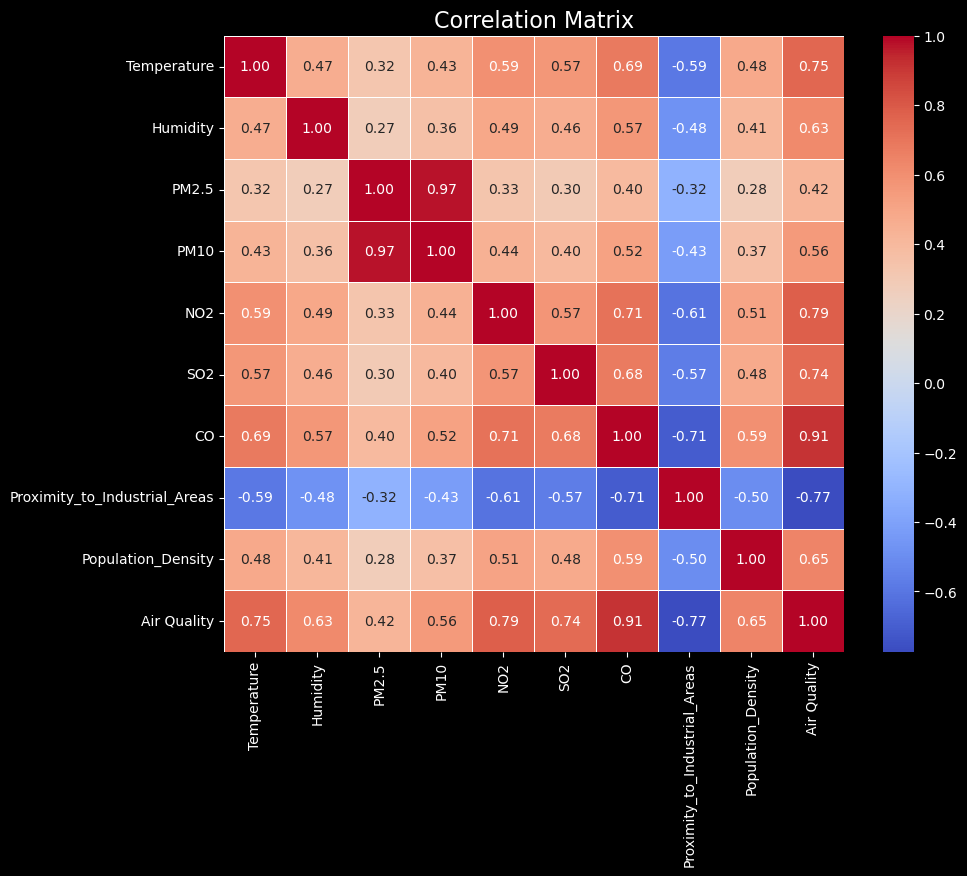

In [36]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set title
plt.title("Correlation Matrix", fontsize=16)

# Show the plot
plt.show()

In [37]:
# Split features (X) and target (y)
X = df.drop(columns=['Air Quality']).values
y = df['Air Quality'].values

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and Train the SVM Model
svm_model = SVC(kernel='rbf', C=1.0, decision_function_shape='ovr', random_state=42)
svm_model.fit(X_train, y_train)

# Make Predictions
y_pred = svm_model.predict(X_test)


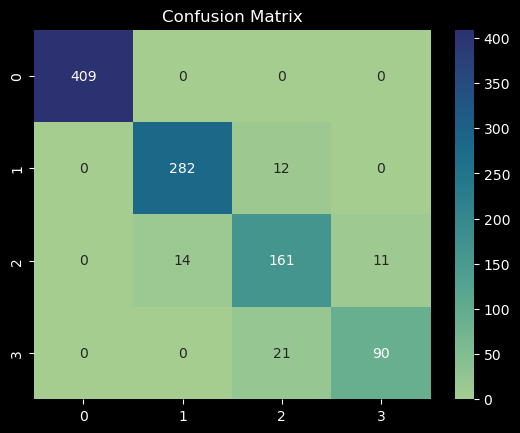

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.95      0.96      0.96       294
           2       0.83      0.87      0.85       186
           3       0.89      0.81      0.85       111

    accuracy                           0.94      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000

Accuracy: 0.942


In [38]:
plt.style.use('dark_background')
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='crest', fmt='d')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred, zero_division=0))

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")